<h1>MLAD課題_1203</h1>
南 昂汰 1922076

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [180]:
# kaggleからダウンロードしたオープンデータ Predicting Pulsar Star
# https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate?select=pulsar_data_test.csv
# パルサーは、ここ地球上で検出可能な電波放射を生成する珍しいタイプの中性子星です。
# それらは、時空、星間物質、および物質の状態のプローブとして、かなりの科学的関心を集めています。
# 現在、機械学習ツールを使用してパルサー候補に自動的にラベルを付け、迅速な分析を容易にしています。
df = pd.read_csv('pulsar_data_train.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [181]:
# 欠損値を調べる
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [182]:
# 全ての行数は12528
df.shape

(12528, 9)

In [183]:
# 欠損値がある行を除いた行数は9273
df.dropna().shape

(9273, 9)

In [184]:
# 9273行あれば学習データの量は十分だと思うので欠損値がある行を無視します
df2=df.dropna()
df2.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


In [185]:
# Xに特徴量を入れる（目的変数の列を削除したものを代入）
X = df2.drop(columns=['target_class'])
# yに目的変数を入れる
y = df2['target_class']

In [186]:
# データの正規化
from sklearn import preprocessing
X=preprocessing.MinMaxScaler().fit_transform(X)

In [187]:
# 訓練データ、テストデータの作成
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 114514, stratify=y)

In [188]:
# ロジスティック回帰モデル
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train, y_train)
print("正答率(学習) = ", lr.score(X_train,y_train))
print("正答率(テスト) = ", lr.score(X_test,y_test))

正答率(学習) =  0.9744032211676733
正答率(テスト) =  0.9698145752479517


In [189]:
# ニューラルネットワーク（マルチレイヤ―パーセプトロン）
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)
print("正答率(学習) = ", nn.score(X_train,y_train))
print("正答率(テスト) = ", nn.score(X_test,y_test))

正答率(学習) =  0.9788610871440897
正答率(テスト) =  0.9745579991375592


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [190]:
# サポートベクターマシン
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train,y_train)
print("正答率(学習) = ", svc.score(X_train,y_train))
print("正答率(テスト) = ", svc.score(X_test,y_test))

正答率(学習) =  0.9782858786310037
正答率(テスト) =  0.9728331177231565


In [191]:
# 決定木学習
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(X_train, y_train)
print("正答率(学習) = ", dtc.score(X_train,y_train))
print("正答率(テスト) = ", dtc.score(X_test,y_test))

正答率(学習) =  0.9794362956571757
正答率(テスト) =  0.9745579991375592


In [192]:
# Max Voting / Hard voting
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
# 作成したモデルをestimatorsに入れる
estimators=[('lr', lr), ('dtc', dtc), ('svc', svc), ('nn', nn)]
vote=VotingClassifier(estimators=estimators, voting='hard')
vote.fit(X_train, y_train)
print("正答率(学習) = ", vote.score(X_train,y_train))
print("正答率(テスト) = ", vote.score(X_test,y_test))

正答率(学習) =  0.9782858786310037
正答率(テスト) =  0.9732643380767573


In [193]:
# Weighted Average Voting / Soft Voting
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
estimators=[('lr', lr), ('dtc', dtc), ('svc', svc), ('nn', nn)]
# 作成したモデルをestimatorsに入れる。weightsを適宜設定する。
wa_vote=VotingClassifier(estimators=estimators, voting='soft', weights=[3, 2, 1, 1])
wa_vote.fit(X_train, y_train)
print("正答率(学習) = ", wa_vote.score(X_train,y_train))
print("正答率(テスト) = ", wa_vote.score(X_test,y_test))

正答率(学習) =  0.9788610871440897
正答率(テスト) =  0.9745579991375592


In [194]:
# Bagging
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
from sklearn.ensemble import BaggingClassifier
# ベースとなるモデルを指定する。
bag=BaggingClassifier(base_estimator=dtc, n_estimators=100)
start = time.time()
bag.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("経過時間:{0}".format(elapsed_time) + "[sec]")
print("正答率(学習) = ", bag.score(X_train,y_train))
print("正答率(テスト) = ", bag.score(X_test,y_test))

経過時間:0.7445240020751953[sec]
正答率(学習) =  0.9794362956571757
正答率(テスト) =  0.9745579991375592


In [195]:
# ランダムフォレスト
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
start = time.time()
rf.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("経過時間:{0}".format(elapsed_time) + "[sec]")
print("正答率(学習) = ", rf.score(X_train,y_train))
print("正答率(テスト) = ", rf.score(X_test,y_test))

経過時間:1.224529504776001[sec]
正答率(学習) =  1.0
正答率(テスト) =  0.9762828805519621


In [196]:
# AdaBoost
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
# ベースとなるモデルを指定する。
ab = AdaBoostClassifier(base_estimator=dtc)
start = time.time()
ab.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("経過時間:{0}".format(elapsed_time) + "[sec]")
print("正答率(学習) = ", ab.score(X_train,y_train))
print("正答率(テスト) = ", ab.score(X_test,y_test))

経過時間:0.5816309452056885[sec]
正答率(学習) =  0.9817371297095197
正答率(テスト) =  0.9754204398447607


In [197]:
# GradientBoosting
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
start = time.time()
gbc.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("経過時間:{0}".format(elapsed_time) + "[sec]")
print("正答率(学習) = ", gbc.score(X_train,y_train))
print("正答率(テスト) = ", gbc.score(X_test,y_test))

経過時間:2.2126171588897705[sec]
正答率(学習) =  0.9889272361230946
正答率(テスト) =  0.9719706770159552


In [198]:
# LightGBM
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
import lightgbm
lgb = lightgbm.LGBMClassifier()
y_train=np.reshape(y_train,(-1))
y_test=np.reshape(y_test,(-1))
start = time.time()
lgb.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("経過時間:{0}".format(elapsed_time) + "[sec]")
print("正答率(学習) = ", lgb.score(X_train,y_train))
print("正答率(テスト) = ", lgb.score(X_test,y_test))

経過時間:0.2012791633605957[sec]
正答率(学習) =  1.0
正答率(テスト) =  0.9780077619663649


In [199]:
# 各モデルの予測結果を集約
rf_feature = rf.predict(X_train)
bag_feature = bag.predict(X_train)
ab_feature = ab.predict(X_train)
gbc_feature = gbc.predict(X_train)
nn_feature = nn.predict(X_train)
dtc_feature = dtc.predict(X_train)
lr_feature = lr.predict(X_train)
svc_feature = svc.predict(X_train)
features_df = pd.DataFrame( {'Logistic': lr_feature, 'SVC': svc_feature, 'Decision Tree': dtc_feature,
                             'MLP': nn_feature, 'Random forest': rf_feature, 'Bagging': bag_feature, 
                             'ada boost': ab_feature, 'Gradient boosting': gbc_feature })
features_df.tail(10)

,Logistic,SVC,Decision Tree,MLP,Random forest,Bagging,ada boost,Gradient boosting
6944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6948,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


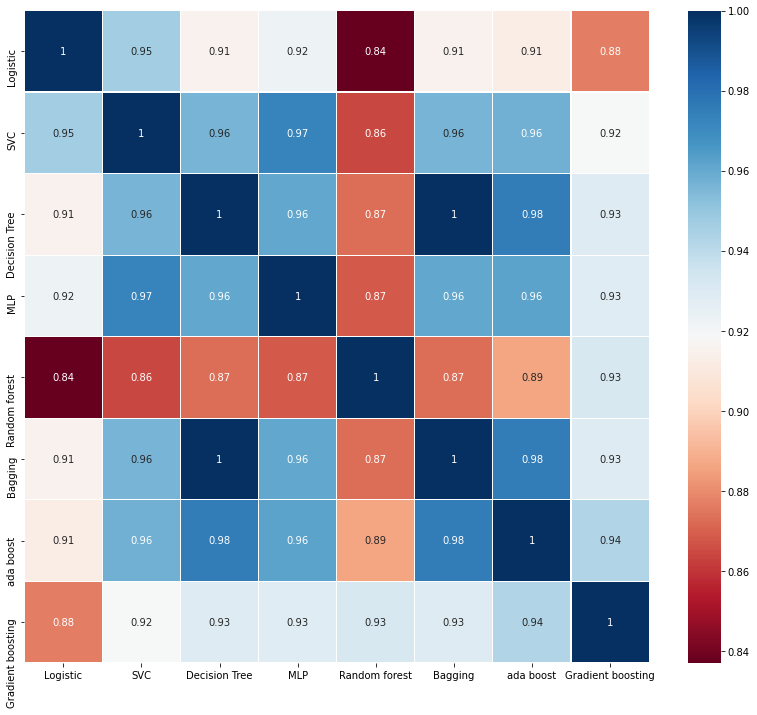

In [200]:
# 各モデルの予測結果の相関を見る
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(features_df.corr(),linewidths=0.1, 
cmap=colormap, linecolor='white', 
annot=True)

In [201]:
# Stacking
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
from sklearn.ensemble import StackingClassifier
# 一段目に使うモデルを列挙
estimators=[('lr', lr), ('gbc', gbc),('dtc', dtc)]
# 一段目と二段目のモデルを指定
stk=StackingClassifier(estimators=estimators, final_estimator=lr)
start = time.time()
stk.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("経過時間:{0}".format(elapsed_time) + "[sec]")
print("正答率(学習) = ", stk.score(X_train,y_train))
print("正答率(テスト) = ", stk.score(X_test,y_test))

経過時間:11.24924349784851[sec]
正答率(学習) =  0.9814495254529767
正答率(テスト) =  0.9762828805519621


In [202]:
# y_predに予測されたラベルをいれる
y_predict = stk.predict(X_test)

# 適合率、再現率、f1値などを表示
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2106
         1.0       0.94      0.79      0.86       213

    accuracy                           0.98      2319
   macro avg       0.96      0.89      0.92      2319
weighted avg       0.98      0.98      0.98      2319



In [203]:
# 別のスタッキング
# MLP、AdaBoost、Baggingの推論結果を新たなデータに集約し、SVCに投入する
estimators=[('nn', nn), ('ab', ab),('bag', bag)]
stk=StackingClassifier(estimators=estimators, final_estimator=svc)
start = time.time()
stk.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("経過時間:{0}".format(elapsed_time) + "[sec]")
print("正答率(学習) = ", stk.score(X_train,y_train))
print("正答率(テスト) = ", stk.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



経過時間:35.71339201927185[sec]
正答率(学習) =  0.9795800977854472
正答率(テスト) =  0.97498921949116


In [204]:
# y_predに予測されたラベルをいれる
y_predict = stk.predict(X_test)

# 適合率、再現率、f1値などを表示
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2106
         1.0       0.92      0.79      0.85       213

    accuracy                           0.97      2319
   macro avg       0.95      0.89      0.92      2319
weighted avg       0.97      0.97      0.97      2319

